### Author: Vaishnav Krishna P
#### Data Source: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
### CodSoft Intership(Movie Rating)
#### EDA Notebook

task:
* Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
* Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [15]:
# importing necessory library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for negleting the incompactable warnings
import warnings
warnings.filterwarnings(action="ignore")

# importing statistics libraries 
import statistics 
from scipy.stats import skew

# For encoding the categorical_features
from sklearn.preprocessing import LabelEncoder
# print options
pd.set_option("display.max_rows",None)

In [2]:
# loading the dataset 
df = pd.read_csv("IMDb Movies India.csv",encoding="latin")

In [3]:
# The first 5 datapoints in the dataframe
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.shape

(15509, 10)

* The dataset consist of large amount of missing values.
* dimension of the dataframe:15509 datapoints and 10 features

### EDA: Explorative data Analysis

steps includes:
1. Missing value Analysis
2. Numerical features
3. categorical features
4. Corelation Analysis
5. Outlier Analysis
6. Data Visualisation 
7. Data Transaformation(Encoding the categorical features to Numerical features)

### MISSING VALUE ANALYSIS

In [6]:
# Missing values 
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

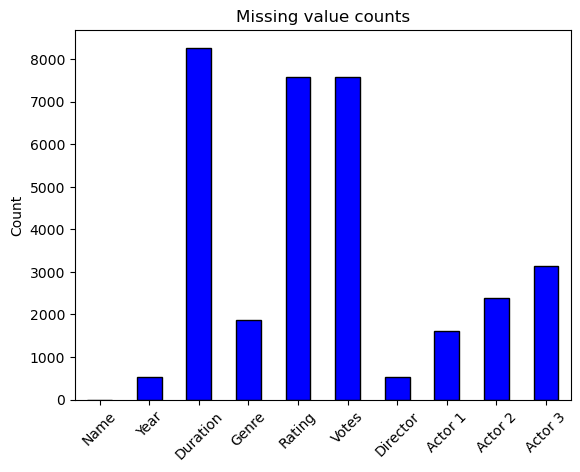

In [7]:
# Visualisation of the Missing values
plt.title("Missing value counts")
df.isnull().sum().plot(kind="bar",color="b",edgecolor="k")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [8]:
# percentage of missing values in each features
perc_missing = 100 * (df.isnull().sum()/len(df))

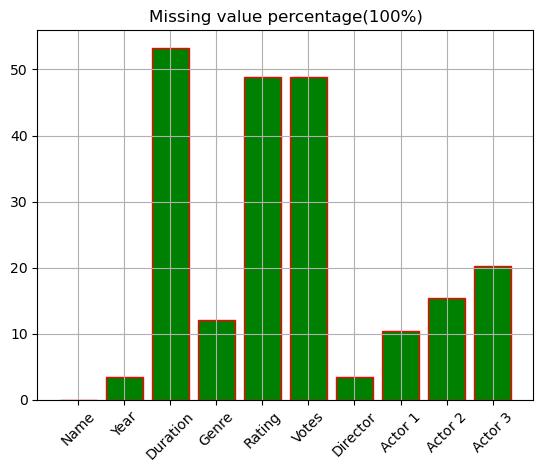

In [9]:
plt.title("Missing value percentage(100%)")
plt.bar(df.columns,perc_missing,color="g",edgecolor="r")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* So,More than 50% of the Duration,rating,Votes are null
* Many of the target feature is empty

### DATA VISUALISATION

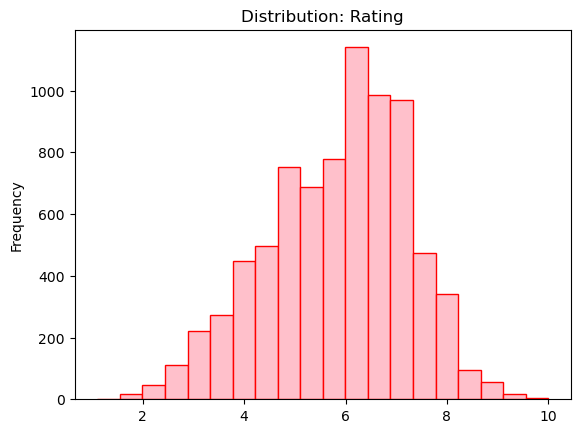

In [10]:
# Only Numerical feature directlt given is Rating
# Lets, explore that feature
plt.title("Distribution: Rating")
df["Rating"].plot(kind="hist",bins=20,color="pink",edgecolor="r")
plt.show()

* Distrution of Rating is a Normal distribution.

### Cleaning the data for EDA: Explorative data Analysis
* Stategy: removing all the datapoint with missing values

In [11]:
# cleaning the dataset for the analysis 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


#### Votes: feature EDA

In [12]:
# removing the "," from the dataset to typecast to the float
df["Votes"] = df["Votes"].str.replace(",","")
df["Votes"] = df["Votes"].astype("float")

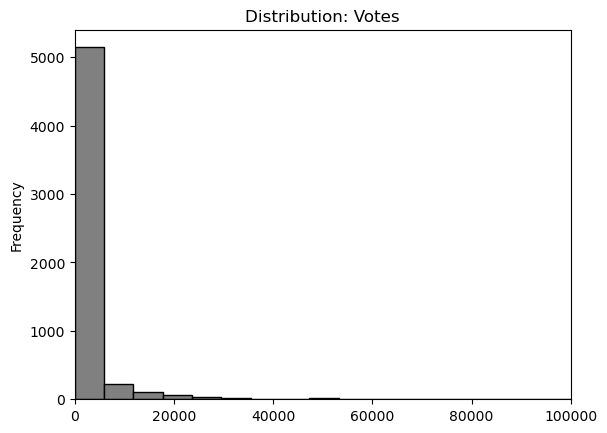

In [13]:
# Distribution of the feature Votes
df["Votes"].plot(kind="hist",bins=100,color="grey",edgecolor="k",title="Distribution: Votes")
plt.xlim(0,100000)
plt.show()

In [16]:
skew(df["Votes"])

21.644879338176576

* Votes is a highly skewed feature.have to apply some transformation for reduce the skewness

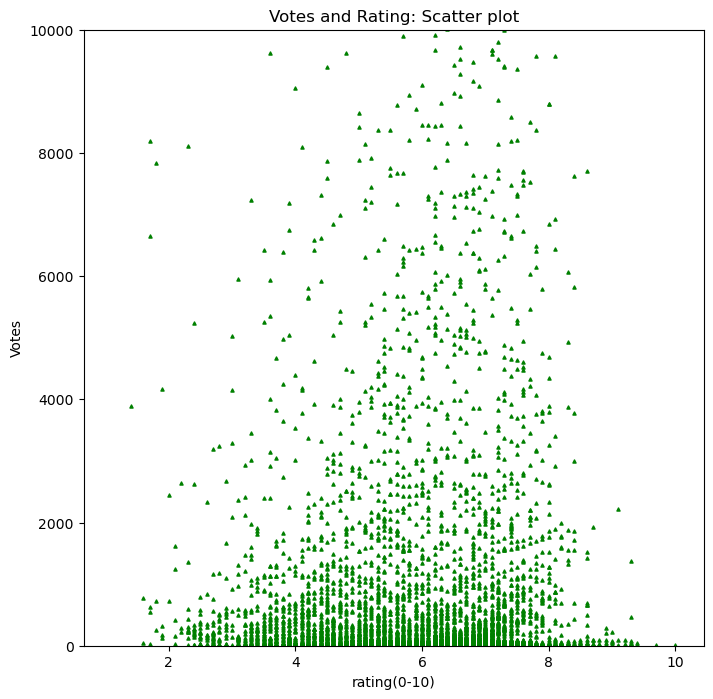

In [14]:
# Visuaisation year and Votes
plt.figure(figsize=(8,8))
plt.title("Votes and Rating: Scatter plot")
plt.scatter(df["Rating"],df["Votes"],marker='^',color="g",s=5)
plt.ylim(0,10000)
plt.xlabel("rating(0-10)")
plt.ylabel("Votes")
plt.show()

In [15]:
# Statis tical description
df["Votes"].describe()

count      5659.000000
mean       2697.649585
std       13651.503584
min           5.000000
25%          30.000000
50%         131.000000
75%         922.500000
max      591417.000000
Name: Votes, dtype: float64

In [16]:
# Corelation b/w Votes and rating
df["Votes"].corr(df["Rating"])

0.14256291749431166

#### Actor 1,2,3: EDA

In [17]:
# Actor1,Actor2,Actor3
# Encoding these features
encoder = LabelEncoder() 
features = ["Actor 1","Actor 2","Actor 3"]
for feature in features:
    df[feature] = encoder.fit_transform(df[feature])
# df[["Actor 1","Actor 2","Actor 3"]].head()

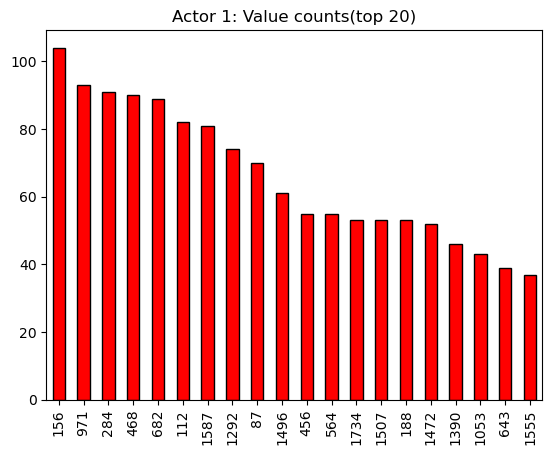

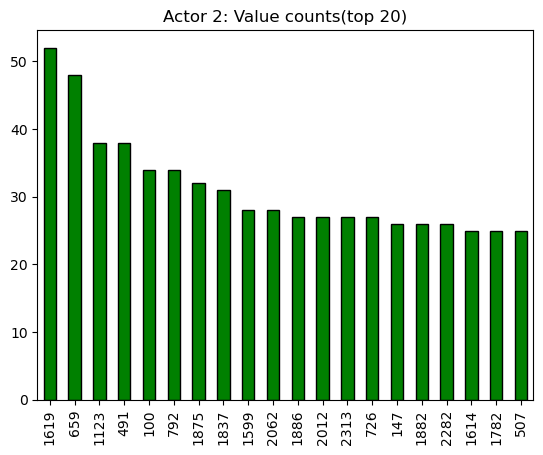

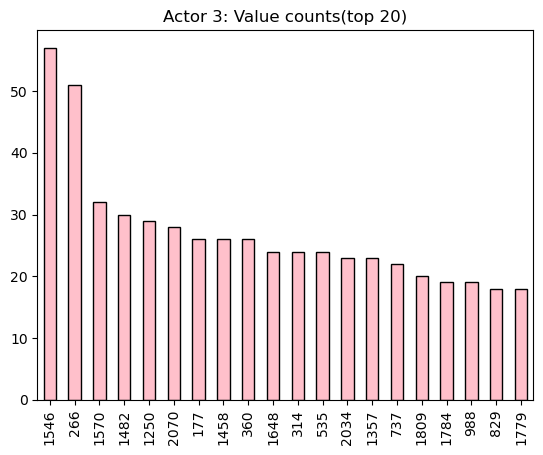

In [18]:
# Distribution of each actor feature
c = ["r","g","pink"]
i = 0
for feature in ["Actor 1","Actor 2","Actor 3"]:
    df[feature].value_counts()[:20].plot(kind="bar",color=c[i],edgecolor="k",title=f"{feature}: Value counts(top 20)")
    i += 1
    plt.show()

* Have to apply the feature Engineering 
* Distribution is Skewed
#### Year feature: EDA

In [19]:
# Removing the "(" and ")" from the string and casting to int
df["Year"] = df["Year"].str.replace("(","").str.replace(")","")
df["Year"] = df["Year"].astype("int")

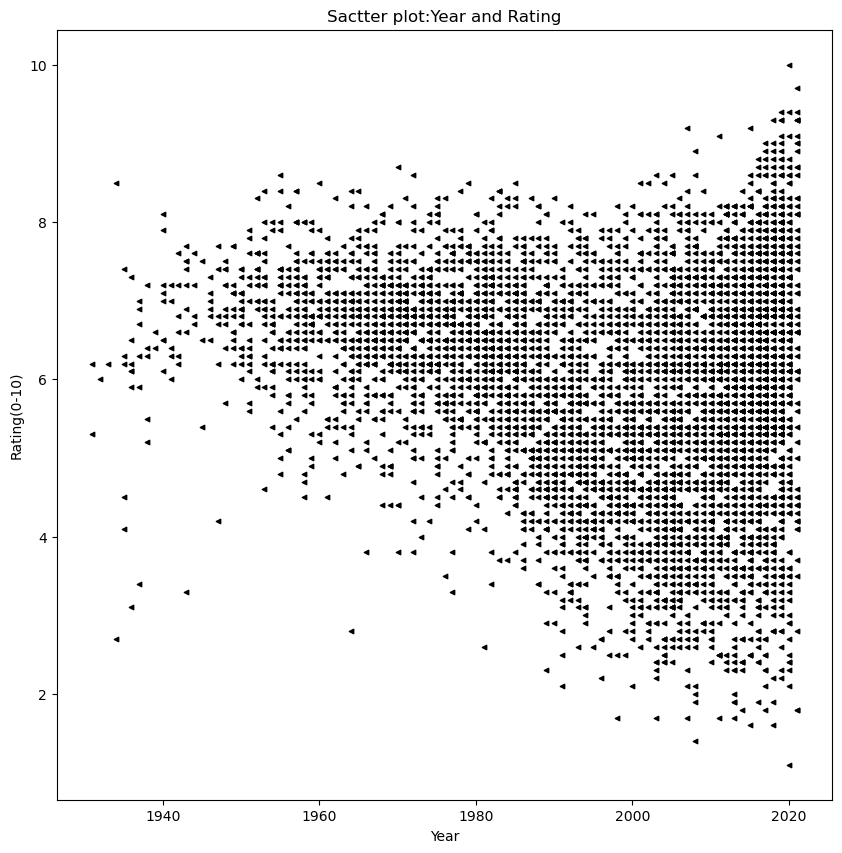

In [20]:
# Scatter plot with year and rating
plt.figure(figsize=(10,10))
plt.title("Sactter plot:Year and Rating")
plt.scatter(df["Year"],df["Rating"],marker="<",color="k",s=10)
plt.xlabel("Year")
plt.ylabel("Rating(0-10)")
plt.show()

* Majority of the movies from 1940 - 1980 rating is very high
* after 2000 the combination of good and bad review

In [21]:
# Corelation between the year and Rating
df["Year"].corr(df["Rating"])

-0.20464236527195118

#### Director feature : EDA

In [22]:
# Encoding the Director feature
df["Director"] = encoder.fit_transform(df["Director"])

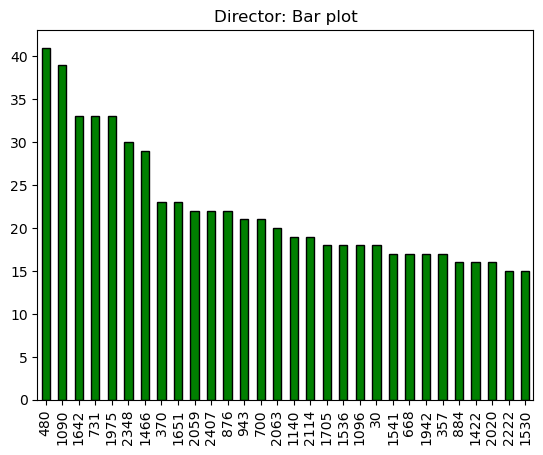

In [23]:
plt.title("Director: Bar plot")
df["Director"].value_counts()[:30].plot(kind="bar",color="g",edgecolor="k")
plt.show()

* Distribution is skewed(positively)

In [24]:
# No of filims directod by director 480
df["Director"].value_counts().get(480)

41

In [25]:
# Corelation matrix
df.corr()

,Year,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,1.000000,-0.204642,0.129749,0.028827,-0.011155,-0.060128,-0.008812
Rating,-0.204642,1.000000,0.142563,-0.006824,0.023430,0.041353,0.042413
Votes,0.129749,0.142563,1.000000,-0.009418,-0.029895,-0.030963,-0.004919
Director,0.028827,-0.006824,-0.009418,1.000000,0.022918,0.018039,0.017915
Actor 1,-0.011155,0.023430,-0.029895,0.022918,1.000000,-0.000642,0.013170
Actor 2,-0.060128,0.041353,-0.030963,0.018039,-0.000642,1.000000,0.010439
Actor 3,-0.008812,0.042413,-0.004919,0.017915,0.013170,0.010439,1.000000


#### Genre feature: EDA

In [26]:
# Number of unique names
df["Name"].nunique()

5385

* Name of the Movie have almost all unique. it is a constant feature so, we can remove in feature engineering

In [27]:
# All atributes in the dataframe 
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [28]:
df["Genre"].head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [29]:
# Value counts of each atributes 
pd.reset_option("display.max_rows")
df["Genre"].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [30]:
# No of unique values 
df["Genre"].nunique()

376

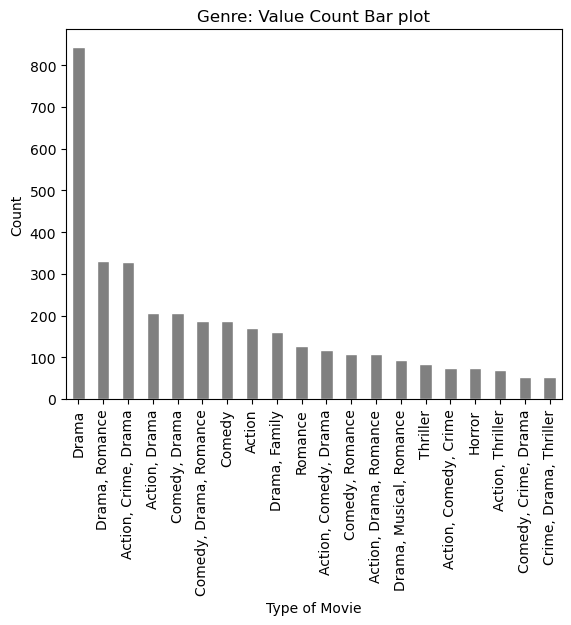

In [31]:
 # Vsualisation of Value Count Bar plot for Genre
plt.title("Genre: Value Count Bar plot")
df["Genre"].value_counts()[:20].plot(kind="bar",color="grey",edgecolor="w")
plt.xlabel("Type of Movie")
plt.ylabel("Count")
plt.show()

* Distribution is Highly skewed
* have to apply so techniques to reduce the noise

In [32]:
# Encoding the genre: feature for analysis 
df["Genre"] = encoder.fit_transform(df["Genre"])
df["Genre"].dtype

dtype('int64')

In [33]:
# Corelation with the target feature
df["Genre"].corr(df["Rating"])

0.12179589934886433

In [34]:
# Visualisation of Genre with target feature
pd.reset_option("display.max_rows")
df.groupby(df["Genre"])["Rating"].mean()

Genre
0      5.040588
1      5.611765
2      7.800000
3      5.624324
4      5.766667
         ...   
371    4.300000
372    7.100000
373    6.150000
374    6.100000
375    4.333333
Name: Rating, Length: 376, dtype: float64

#### Duration feature: EDA

In [35]:
# Duration feature
df["Duration"].head()

1    109 min
3    110 min
5    147 min
6    142 min
8     82 min
Name: Duration, dtype: object

In [36]:
# replacing "min" to convert to numbers(int)
df["Duration"] = df["Duration"].str.replace("min","")

In [37]:
# Typecasting to int datatype
df["Duration"] = df["Duration"].astype("int")

In [38]:
# Value Counts
pd.reset_option("display.max_rows")
df["Duration"].value_counts()

120    169
135    147
130    141
150    133
140    133
      ... 
46       1
201      1
247      1
211      1
250      1
Name: Duration, Length: 174, dtype: int64

In [39]:
# No of unique values 
df["Duration"].nunique()

174

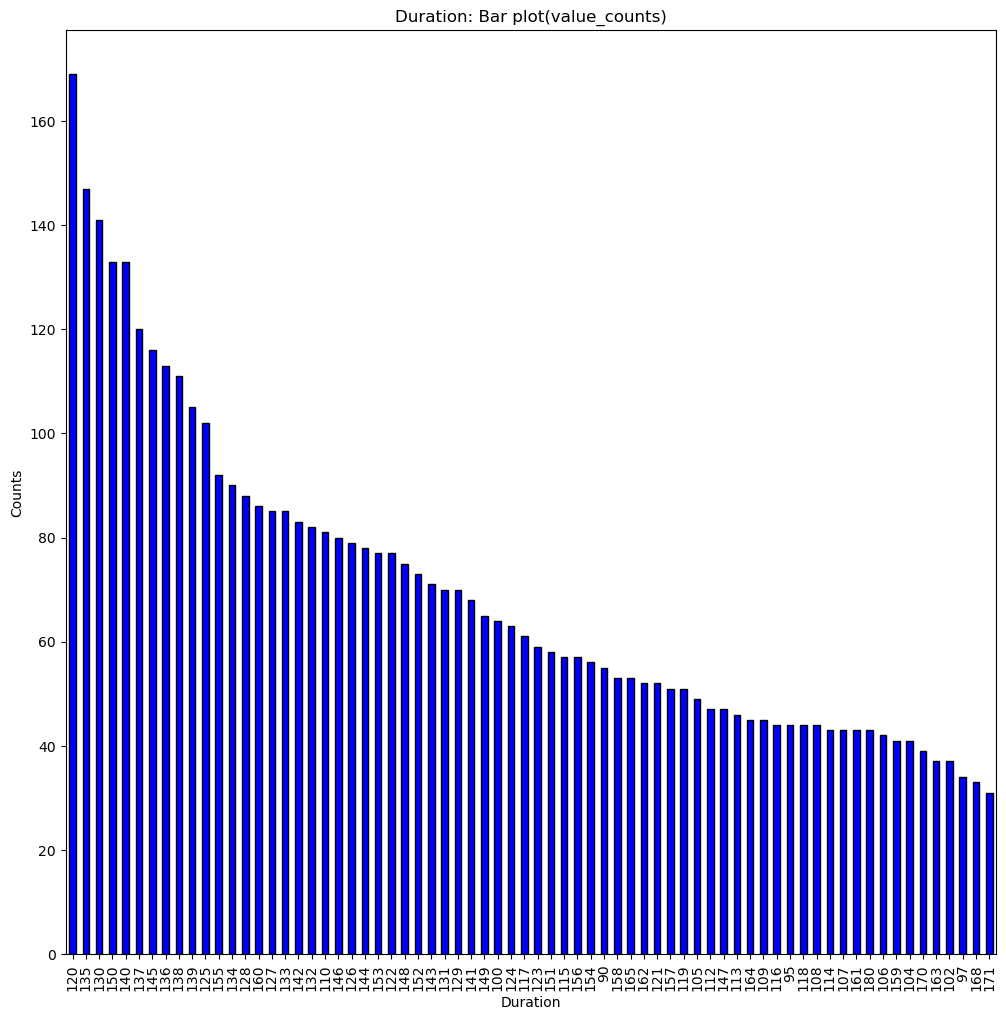

In [40]:
# Visualisation of the Duration bar plot
plt.figure(figsize=(12,12))
plt.title("Duration: Bar plot(value_counts)")
df["Duration"].value_counts()[:70].plot(kind="bar",color="b",edgecolor="k")
plt.xlabel("Duration")
plt.ylabel("Counts")
plt.show()

* So, we have to apply some binning techniques for this feature to reduce the noise

In [41]:
df["Duration"].corr(df["Rating"])

0.0018393493773531857

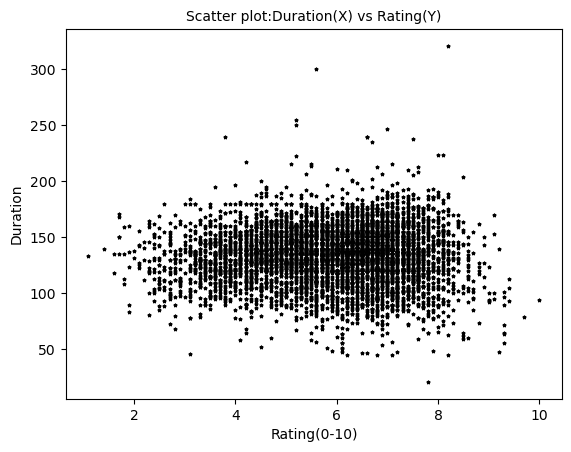

In [42]:
# Scatter plot representing rating and Duration
plt.title("Scatter plot:Duration(X) vs Rating(Y)",color="k",size=10)
plt.scatter(df["Rating"],df["Duration"],color="k",marker = "*",s = 5)
plt.ylabel("Duration")
plt.xlabel("Rating(0-10)")
plt.show()

* No corelation: from the scatter plot it is very understandable
* So, we have to apply some feature Engineering 

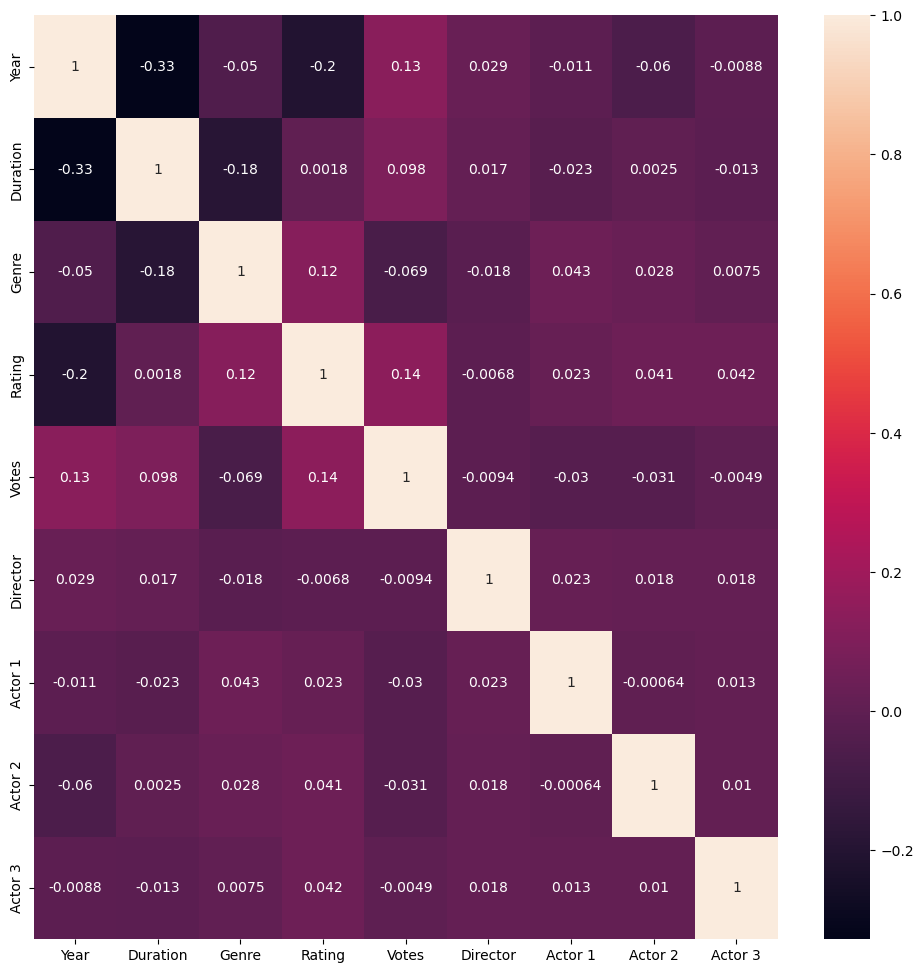

In [43]:
# Corelation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

* Using this we cannot achive a good accuracy. so we have to apply so more techniques in feature engineering for good accuracy

(0.0, 10000.0)

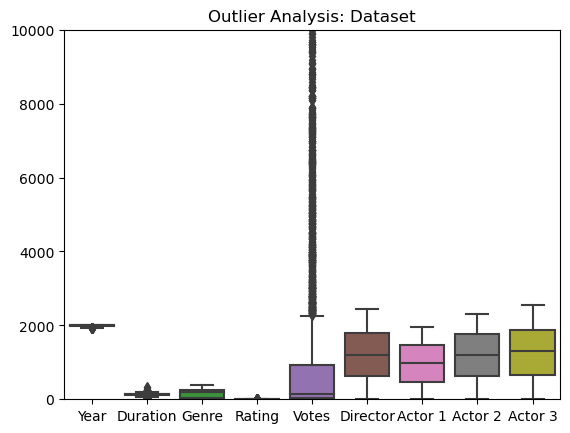

In [57]:
# Outlier analysis
plt.title("Outlier Analysis: Dataset")
sns.boxplot(data=df)
plt.ylim(0,10000)

* Feature Votes have high number of outliers 
* other features doesnot have outliers